<h3>Dependencies</h3>

In [ ]:
!nvidia-smi
!pip install ultralytics
from ultralytics import YOLO
import os 
from IPython.display import display, Image
from IPython import display
import time
!yolo checks
!git clone https://github.com/bosch-ros-pkg/bstld.git
!pip install -r /content/bstld/requirements.txt
!git clone https://github.com/berktepebag/Traffic-light-detection-with-YOLOv3-BOSCH-traffic-light-dataset.git

<h3> Single Image Detection </h3>

In [ ]:
!yolo task=detect mode=predict model=yolov8x.pt conf=0.25 source='/content/drive/MyDrive/YOLOv7/traffic-light.jpg' save=True

100% 131M/131M [00:02<00:00, 60.4MB/s]
Ultralytics YOLOv8.0.49 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLOv8x summary (fused): 268 layers, 68200608 parameters, 0 gradients, 257.8 GFLOPs

image 1/1 /content/drive/MyDrive/YOLOv7/traffic-light.jpg: 384x640 1 traffic light, 25.5ms
Speed: 3.7ms preprocess, 25.5ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2


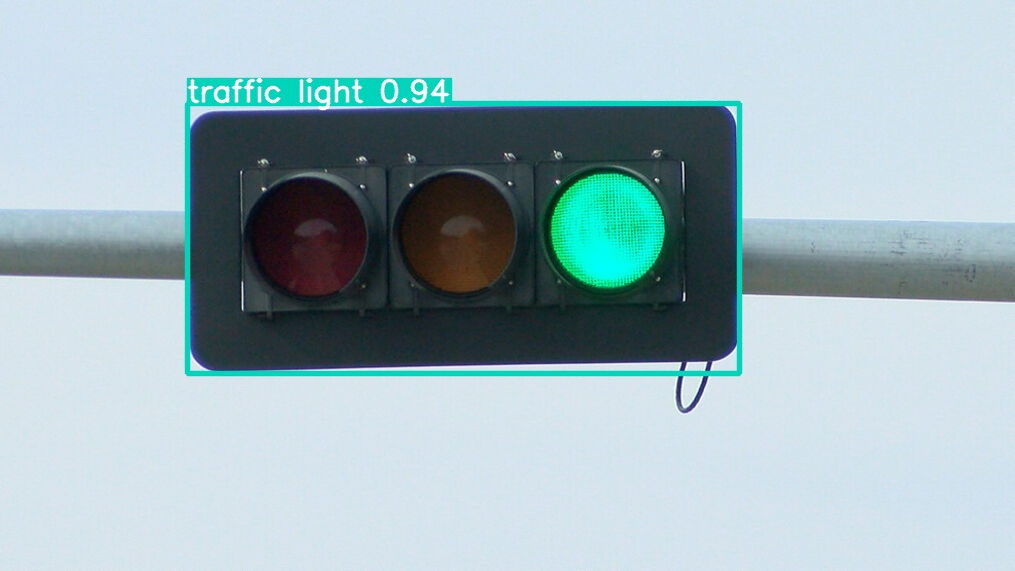

In [ ]:
Image(filename='runs/detect/predict2/traffic-light.jpg', height=600)

In [ ]:
!unzip PATH_HERE/rebuilt.dataset_train_rgb.zip.004

Archive:  /content/drive/MyDrive/YOLOv7/input/rebuilt.dataset_train_rgb.zip.004
  inflating: rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/233186.png  
  inflating: rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/233222.png  
  inflating: rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/233228.png  
  inflating: rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/233278.png  
  inflating: rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/233322.png  
  inflating: rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/233340.png  
  inflating: rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/233364.png  
  inflating: rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/233396.png  
  inflating: rgb/train/2017-02-03-11-44-56_los_altos_mountain_view_traffic_lights_bag/233478.png  
  inflating: rgb/train/2017-0

In [ ]:
!yolo task=detect mode=train data=/content/rgb/train/traffic-lights/voc-bosch.data  model=yolov8m.pt epochs=30


Ultralytics YOLOv8.0.49 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/rgb/train/traffic-lights/voc-bosch.data, epochs=30, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, min_memory=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=Fals

In [ ]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [ ]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [ ]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()